In [1]:
%%capture
%cd ..
!pip install -e .
#!python -m stability_sdk.client --help

In [2]:
import getpass
import io
import os

from IPython.display import display
from PIL import Image
from stability_sdk import client

# To get your API key, visit https://beta.dreamstudio.ai/membership
os.environ['API_KEY'] = getpass.getpass('Enter your API Key')

stability_api = client.StabilityInference(
    key=os.environ['API_KEY'], 
    verbose=True,
)

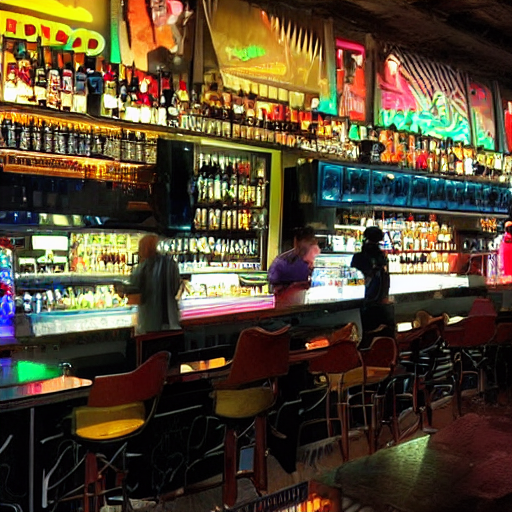

In [3]:
# the object returned is a python generator
answers = stability_api.generate(
    prompt="foo bar baz"
)

# iterating over the generator produces the api response
for resp in answers:
    for artifact in resp.artifacts:
        img = Image.open(io.BytesIO(artifact.binary))
        display(img)


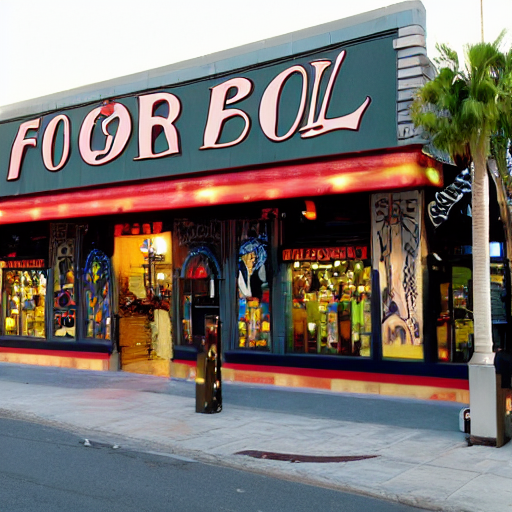

In [4]:
answers = stability_api.generate(
    prompt="foo bar baz"
)

# Alternatively you can use the provided convenience function to 
# to write images to disk as they arrive
for img_fname, artifact in client.process_artifacts_from_answers(
    prefix = "my_image_", # timestamp or random string or could be a decent default. shouldn't be required.
    answers=answers,
    write=False, # if set to True, image will be written to img_fname
):
    img = Image.open(io.BytesIO(artifact.binary))
    display(img)